## 1. Install and import liberaries

In [ ]:
# !pip install requests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

## 2. Load data from csv and API

In [4]:
path = "Additional files"
df = pd.read_csv(os.path.join(path, 'dialect_dataset.csv'))
df

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ
...,...,...
458192,1019484980282580992,BH
458193,1021083283709407232,BH
458194,1017477537889431552,BH
458195,1022430374696239232,BH


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


### Prepare ids for API request

In [6]:
ids = list(df.id.astype('string'))

In [ ]:
bulck_size = 1000
text = dict()

# api-endpoint
URL = "https://recruitment.aimtechnologies.co/ai-tasks"

for i in range(0, len(ids), bulck_size):
    # sending get request and saving the response as response object
    r = requests.post(url = URL, json = ids[i:i+bulck_size])#, params = PARAMS)

    # orig.update(extra)
    # extracting data in json format
    text.update(r.json())

In [ ]:
len(text)

458197

### Merge API responses to DF

In [ ]:
df.id = df.id.astype('string')

In [ ]:
df = df.set_index('id')
df

,dialect
id,
1175358310087892992,IQ
1175416117793349632,IQ
1175450108898565888,IQ
1175471073770573824,IQ
1175496913145217024,IQ
...,...
1019484980282580992,BH
1021083283709407232,BH
1017477537889431552,BH


In [ ]:
df['text'] = df.from_dict(text, orient='index')
df

,dialect,text
id,,
1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...


## 3. EDA

In [8]:
df.dialect.value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

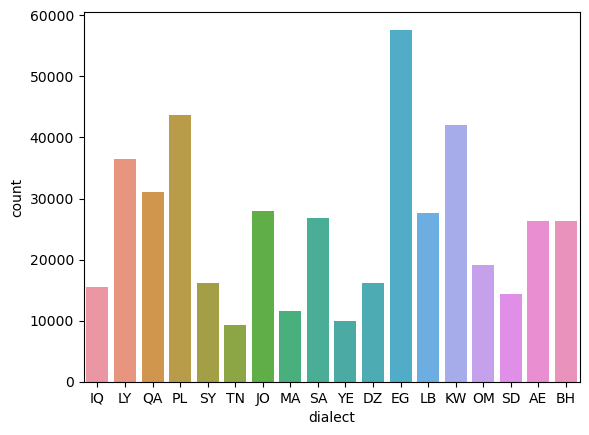

In [9]:
sns.countplot(x="dialect", data=df)
plt.show()

### Number of words in a tweet

In [11]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df

,id,dialect,text,word_count
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,7
...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,5
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,6
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,14
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,6


In [12]:
dialects = set(df.dialect.values)
dialects

{'AE',
 'BH',
 'DZ',
 'EG',
 'IQ',
 'JO',
 'KW',
 'LB',
 'LY',
 'MA',
 'OM',
 'PL',
 'QA',
 'SA',
 'SD',
 'SY',
 'TN',
 'YE'}

In [13]:
NO_OF_CLASSES = len(dialects)

In [ ]:
df.groupby('dialect').mean()

,word_count
dialect,
AE,14.135458
BH,12.458961
DZ,12.820491
EG,15.123482
IQ,12.111505
JO,12.392178
KW,14.639341
LB,13.744107
LY,12.853311


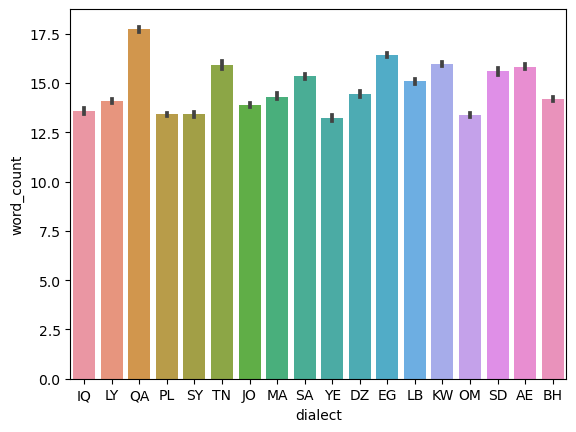

In [14]:
sns.barplot(x="dialect", y="word_count", data=df)
plt.show()

### Number of Characters in a tweet

In [15]:
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df

,id,dialect,text,word_count,char_count
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8,48
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19,120
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5,31
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5,42
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,7,34
...,...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,5,37
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,6,44
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,14,73
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,6,43


In [16]:
MAX_SEQUENCE_LENGTH = df.char_count.max()
MAX_SEQUENCE_LENGTH

823

### Save Dataframe to CSV

In [19]:
df.to_csv(os.path.join(path, 'dialect_dataset_fetched.csv'), index=False)